In [1]:
from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
import tensorflow as tf
import textgenrnn

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


# Overview
- Intro about machine learning and education 
    - Robot Videos
        - What's the potential here?
        - Already research on working with young children on language (literacy and mathematics)
        - Allegedly, autistic children are less shy interacting with a robot
        - Kids like socially interacting with a robot, but it needs to be able to understand emotion -- How?
   
    - Pearson Listing
        - Maybe not robots? Software platform. *Differentiated Instruction*
        - Can it take in unstructured data? Would students need to drag and drop solution methods? 
- Simple Linear Regression
    - 2d Boston
        - Look at scatter plot of RM and MEDV
        - How do we fit a line?
        - How do we know the best fit?
        - How do we optimize?
    - 3d Boston
        - Same stuff
    - More d Boston
        - Same stuff
        - Requires understanding statistics
- Logistic Regression
    - MNIST: Lots of data
    - How does logistic regression work?
    - How do we feed in an image?
- CNN with MNIST
- RNN generated text examples
- Conclusion
    

In [3]:
boston_dataset = load_boston()

In [19]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston_df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_df['MEDV'] = boston_dataset.target

In [5]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# X = pd.DataFrame(np.c_[boston_df['LSTAT'], boston_df['RM'], boston_df['CRIM'], boston_df['ZN'], boston_df['INDUS'], boston_df['CHAS'], boston_df['NOX'], boston_df['AGE'], boston_df['DIS'], boston_df['RAD'], boston_df['TAX'], boston_df['PTRATIO'], boston_df['B']], columns = ['LSTAT','RM', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B'])
# X = pd.DataFrame(np.c_[boston_df['LSTAT'], boston_df['RM']], columns=['LSTAT', 'RM'])
X = pd.DataFrame(boston_df['RM'], columns=['RM'])
Y = boston_df['MEDV']

In [7]:
only_rooms_df = pd.DataFrame(np.c_[boston_df['RM'], boston_df['MEDV']], columns=['RM', 'MEDV'])

# The Robots Are Coming For Your Teaching Job: Educational Ramifications in the Machine Learning Age
### Matthew Moran
### matthew.j.moran@gmail.com
### MMC Friday Talk -- January 18, 2019

![none](FT_17.10.04_Automation_Americansview.png)

## Data Scientist Responsibilities:
- Apply a variety of machine learning techniques, from linear regression to the latest neural network modeling techniques to improve the efficacy of our educational materials and pedagogy.
- Design data collection approaches that capture relevant user behavior to enhance both content and overall learning experience.





- Source: Pearson Job Listing

## We are looking for a Senior Data Scientist with:
- Ph.D. in a quantitative field or relevant experience.
- 5 years experience with education or AI systems, specializing in one or more of the following: computer adaptive testing, deep learning, and/or reinforcement learning. Have the ability to adapt those methods in new situations.
- Strong coding skills in Python including experience shepherding exploratory research code into prototypes. Experience with deep learning frameworks (such as TensorFlow). Experience with other languages, such as R, and ability to move between languages and frameworks a plus

                                        
                                        
- Source: Pearson Job Listing

## Software Developer
- Working in a small team, you will create and deliver commercial software services that **automatically evaluate student writing**. Primary responsibility is to create, test, and maintain machine-learning based services used in a variety of assessment and learning situations from K-20 and beyond.







- Source: Pearson Job Listing

## Is the robot takeover imminent? Will it ever be a good thing? Is it already good?
- Good or bad, there is money and research being poured into these efforts.
- Humanoid robots
    - Yes, the videos are laughable, but is there potential?
        - Language
        - Children with Autism
        - Reading Emotions

## Is the robot takeover imminent? Will it ever be a good thing? Is it already good?
- Good or bad, there is money and research being poured into these efforts.
- Assistive learning software systems
    - *Differentiated Instruction*

## Is the robot takeover imminent? Will it ever be a good thing? Is it already good?
- Good or bad, there is money and research being poured into these efforts.
- Robo-grading
    - Sounds great
    - Hard for math?

# How are these systems built?
- Understand the data transformations
- Understand the compromises (trading quality for convenience?)

# What is Machine Learning?

# What is Machine Learning?
## Consider the familiar example -- RM is average number of rooms, MEDV is median value in $1000s
## We will try to predict the value of a home from the number of rooms.

In [96]:
only_rooms_df.head(10)

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
5,6.430,28.7
6,6.012,22.9
7,6.172,27.1
8,5.631,16.5
9,6.004,18.9


# Does there seem to be any correlation between number of rooms and price?

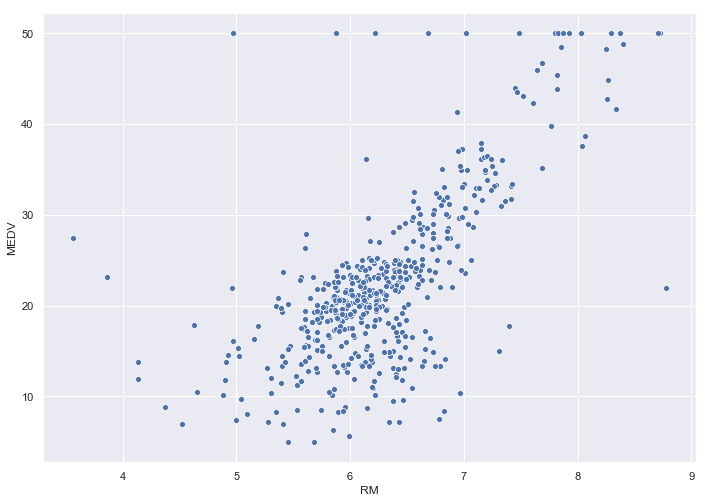

In [10]:
ax = sns.scatterplot(x="RM", y="MEDV", data=only_rooms_df)

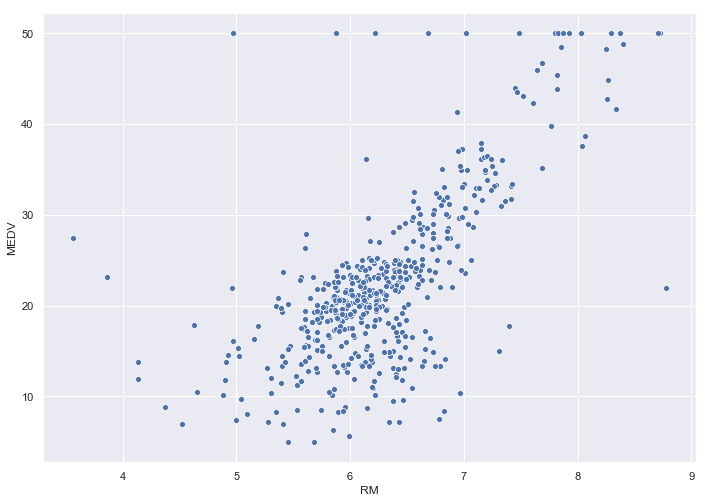

In [11]:
ax = sns.scatterplot(x="RM", y="MEDV", data=only_rooms_df)

## Let's see if we can *fit a line* to this data.

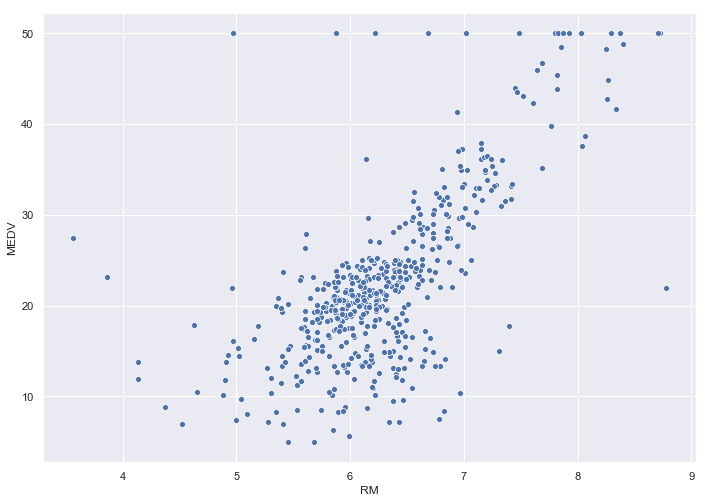

In [11]:
ax = sns.scatterplot(x="RM", y="MEDV", data=only_rooms_df)

## So we want to find $a$ and $b$ such that $y = ax + b$ where $y$ is the price of the house and $b$ is the number of rooms.

# Big Idea
## We have a bunch of data points that sort of make a line.
## We want to find values for $a$ and $b$ in $y = ax + b$ that *fit* the data points.
## We define a criterion for how well a line fits the data.
## We look for a line that optimizes our criterion.
 - Using an optimization algorithm like gradient descent (note: better ways to optimize for linear regression)

## Let's define our criterion for the $a$ and $b$ that make $y = ax + b$ fit our data the best to be the squared error criterion.
### So we are going to take the difference between the predicted value and the actual value, square it, and call that our error. We want $a$ and $b$ such that the sum of these *errors* is as small as possible.

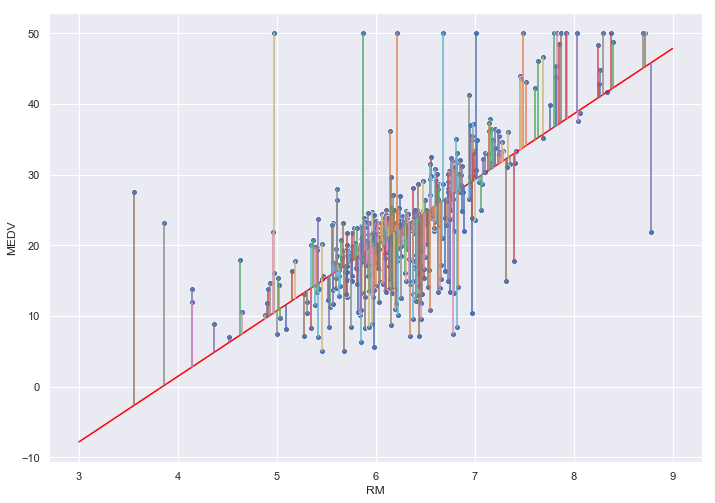

In [26]:
dataset = boston_df
ax = sns.scatterplot(x="RM", y="MEDV", data=dataset)
x = np.linspace(3, 9, 1000)
ax.plot(x, 9.274 * x - 35.64, color='red')

for row in dataset.itertuples():
    ax.plot([row.RM, row.RM], [row.MEDV, 9.274 * row.RM - 35.64])

## In this case $a \approx 9.3$ and $b \approx -35.6$. So we have
$$ \text{MEDV} = 9.3 * \text{RM} - 35.6 $$

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=666)

In [98]:
train['RM'].head()

343    6.696
342    6.540
458    6.301
376    6.649
302    6.495
Name: RM, dtype: float64

In [99]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
lin_model.coef_

array([9.27368249])

In [22]:
lin_model.intercept_

-35.640097347030476

In [34]:
X_test['MEDV'] = Y_test
X_test['prediction'] = X_test['RM'] * lin_model.coef_[0] + lin_model.intercept_

/Users/mmoran/anaconda/envs/mmc2019/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mmoran/anaconda/envs/mmc2019/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
X_test.head()

,RM,MEDV,prediction
81,6.619,23.9,25.742407
453,7.393,17.8,32.920237
311,6.122,22.1,21.133387
291,7.148,37.3,30.648185
360,6.398,25.0,23.692923


In [36]:
X_test['diff_squared'] = (X_test['prediction'] - Y_test) ** 2

/Users/mmoran/anaconda/envs/mmc2019/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
X_test.head()

,RM,MEDV,prediction,diff_squared
81,6.619,23.9,25.742407,3.394464
453,7.393,17.8,32.920237,228.621576
311,6.122,22.1,21.133387,0.934341
291,7.148,37.3,30.648185,44.246642
360,6.398,25.0,23.692923,1.708450


In [39]:
X_test.diff_squared.sum() / len(X_test)

42.76818033219253

In [41]:
preds_x_train = lin_model.predict(X_train)
mean_squared_error(preds_x_train, Y_train)

43.91464098533468

## So we sum this *dif_squared* column and divide by the number of entries to get our *Mean Squared Error* -- in this case it is about 42.77 (this is on our testing data).

In [51]:
rooms_lstat_df = pd.DataFrame(np.c_[boston_df['RM'], boston_df['LSTAT'], boston_df['MEDV']], columns=['RM', 'LSTAT', 'MEDV'])
train, test = train_test_split(rooms_lstat_df, test_size = 0.25, random_state=666)
lin_model = LinearRegression()
lin_model.fit(np.c_[train['RM'], train['LSTAT']], train['MEDV'].to_frame())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Now consider the same problem, except we know more about the housing market. 
## We add a column of data *LSTAT* that tells  us the percentage of the neighborhood that is *low income*.

In [47]:
rooms_lstat_df.head()

,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [44]:
rooms_lstat_df.head()

,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


## If LSTAT correlates with MEDV, a linear regression on this data should improve our Mean Squared Error.
## Again, we are trying to find a plane $$z = ax + by + c$$ or $$\text{MEDV} = w_1 * \text{RM} + w_2 * \text{LSTAT} + c$$ that minimizes our mean squared error.  

In [54]:
with_preds = test.drop(columns='MEDV')
with_preds['prediction'] =  lin_model.predict(with_preds)
with_preds['MEDV'] = test['MEDV']
with_preds['diff_squared'] = (with_preds['MEDV'] - with_preds['prediction']) ** 2
with_preds.head()

,RM,LSTAT,prediction,MEDV,diff_squared
81,6.619,7.22,27.861800,23.9,15.695861
453,7.393,16.74,26.251842,17.8,71.433626
311,6.122,5.98,25.901409,22.1,14.450713
291,7.148,3.56,33.008254,37.3,18.419088
360,6.398,7.79,26.301045,25.0,1.692718


## We now have a mean squared error of about 28 (it was about 43 when only using number of rooms).

## If we keep adding features, we can probably improve on this model...to a point. For example, if we add in the student to teacher ratio in the local schools we can improve our mean squared error to 26.6 (from 28 with only two features).

In [56]:
rooms_lstat_pt_df = pd.DataFrame(np.c_[boston_df['RM'], boston_df['LSTAT'], boston_df['PTRATIO']], columns=['RM', 'LSTAT', 'PTRATIO'])
Y = boston_df['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(rooms_lstat_pt_df, Y, test_size = 0.25, random_state=666)
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
predictions = lin_model.predict(X_test)
mse = mean_squared_error(predictions, Y_test)
r2 = r2_score(predictions, Y_test)
# print("mse: {} -- r^2: {}".format(mse, r2))
display(rooms_lstat_pt_df.head(5))

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


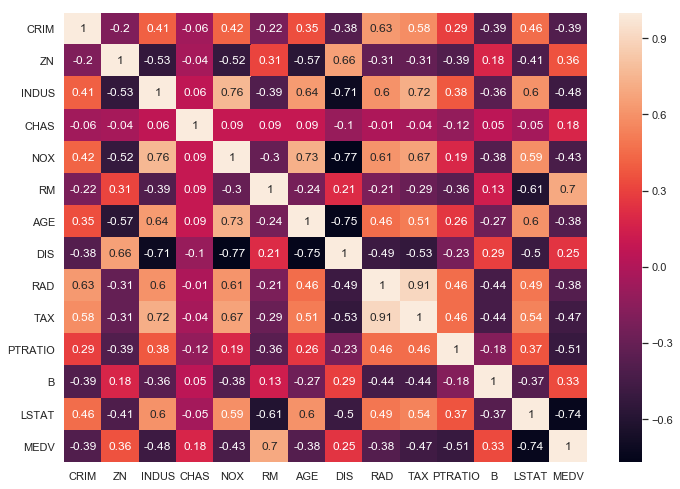

In [57]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
correlation_matrix = boston_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [32]:
X_test['MEDV'] = Y_test
test = X_test

/Users/mmoran/anaconda/envs/mmc2019/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/Users/mmoran/anaconda/envs/mmc2019/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


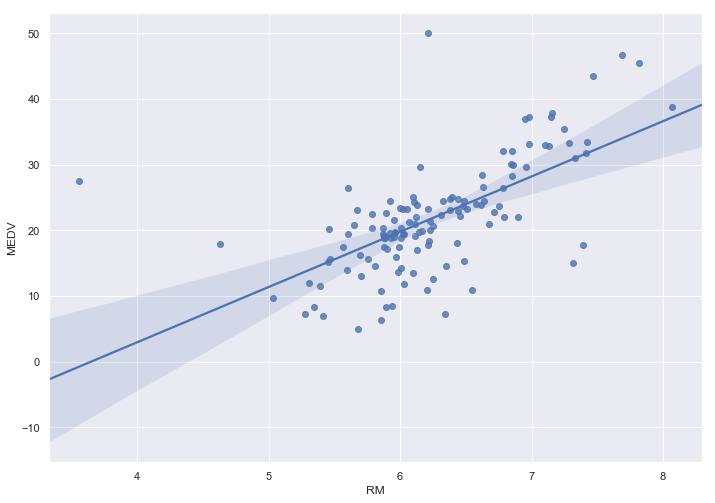

In [34]:
sns.regplot(x="RM", y="MEDV", data=test)

# Another Dataset
## Handwritten digits - can we correctly classify them?
## Much more data this time (70,000 examples)

In [8]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

<Figure size 432x288 with 0 Axes>

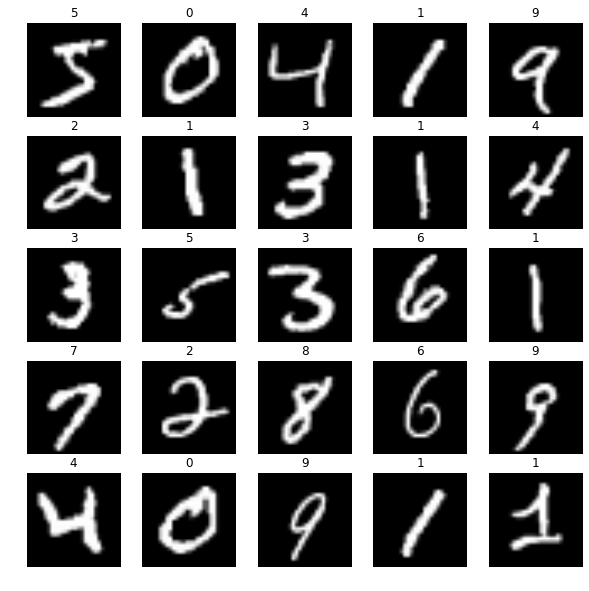

In [4]:
plt.subplots_adjust(hspace=1)
plt.figure(figsize=(10, 10))
for n in range(25):
    img = X_train[n]
    plt.subplot(5,5,n + 1)
    plt.title(Y_train[n])
    plt.axis('off')
    plt.imshow(img, cmap='gray', interpolation='bilinear')

## How can we do this? Is our data different than the Boston Housing data?
## What does this data look like?
- Each image is a 28 x 28 matrix of pixel values from 0 to 255

In [38]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## We can take each 28 x 28 array and make it a 784 dim vector
## Now we have a problem much like the Boston Housing data problem -- we just have a 784 dimensional input.

In [39]:
np.reshape(X_train[0], 784)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

## The output, however, is quite different. In the Boston Housing problem we were predicting a single value, how can we do that here?
## Let's consider a simpler problem: Suppose we have the same dataset, but we are only concerned if the number is a 7 or not a 7.

## We input a 784 dim vector
## We want to output if the image is a 7 or not a 7

## We input a 784 dim vector
## We want to output if the image is a 7 or not a 7 - let's output a 1 if it is a 7 and a 0 if it isn't.

## If this were like our linear regression example we would be looking for coefficients $w_1, w_2, \ldots, w_{784}$ and $c$ such that $$w_1x_1 + w_2x_2 + \cdots + w_{784}x_{784} + c$$ *best fits* our data.

## We'd like our inputs that are 7s to output 1, and everything else to output 0. The linear combination $$w_1x_1 + w_2x_2 + \cdots + w_{784}x_{784} + c$$ could take on any real values, so let's restrict it.

## Consider the sigmoid function 
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

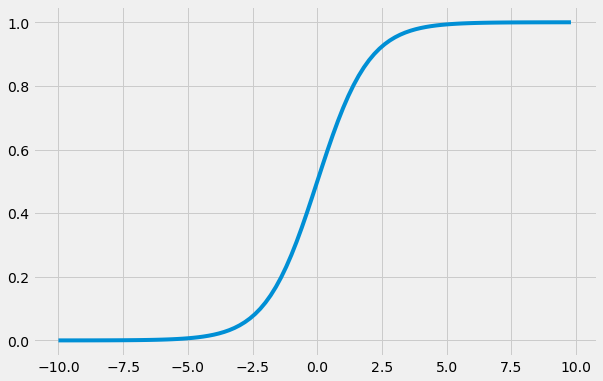

In [67]:
plt.figure(figsize=(9, 6))
plt.style.use('fivethirtyeight')
x = np.arange(-10, 10, 0.2)
plt.axis('on')
plt.plot(x, 1 / (1 + np.exp(-x)))

## This bounds our output between 0 and 1.

## In our linear regression example, we looked at squared error and minimized to find the coefficients that gave us the *best fit*.
## Could we do that here? What would that look like?

## Let $\hat{y}$ represent our output value, the thing we want to be one when we have a 7 or 0 when we don't. Let $y$ be the actual value of our training example.
## Using squared error we could define our loss function as
$$\mathcal{L}(\hat{y}, y) = (y - \hat{y})^2 $$

## Using squared error we could define our loss function as
$$\mathcal{L}(\hat{y}, y) = (y - \hat{y})^2 $$
## This turns out to make the optimization problem non-convex.
## Instead, consider
$$ \mathcal{L}(\hat{y}, y) = - \left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right) $$

$$ \mathcal{L}(\hat{y}, y) = - \left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right) $$
## When $y = 1$
$$ \mathcal{L}(\hat{y}, 1) = - (1) \log(\hat{y}) = - \log(\hat{y}) $$

$$ \mathcal{L}(\hat{y}, y) = - \left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right) $$
## When $y = 1$
$$ \mathcal{L}(\hat{y}, 1) = - (1) \log(\hat{y}) = - \log(\hat{y}) $$
## Remember, we want to minimize our loss, so notice that $- \log(\hat{y})$ is minimized when $\hat{y}$ is large, but remember that $\hat{y}$ is bounded between 0 and 1, so the maximum value it can take on is 1. So our loss function wants our estimate to be as close to 1 as possible when our training example is a 7.

$$ \mathcal{L}(\hat{y}, y) = - \left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right) $$
## Similarly, when $y = 0$
$$ \mathcal{L}(\hat{y}, 0) = - \log(1 - \hat{y}) $$
## So our loss function wants our estimate, $\hat{y}$, to be 0 when our training example is not a 7. 

# Review
## We want to predict if an image is a 7 or not a 7.
## We convert the image from a 28 x 28 array to a 784 vector
## This vector is our input and we want our output to be a 1 if we have a 7 and a 0 if we don't
## The output is computed as follows
$$ z(x) = w_1x_1 + w_2x_2 + \cdots + w_{784}x_{784} + c $$
$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$
## $\sigma(z)$ is bounded between 0 and 1 and our loss function will help us get the *best values* for $w_1, w_2, \ldots, w_{784}, c $ through optimization.

## Let's code this!

In [11]:
Y_train_7 = Y_train == 7
Y_train_7 = Y_train_7.astype(int)

Y_test_7 = Y_test == 7
Y_test_7 = Y_test_7.astype(int)

## Overfitting
## We try to avoid this by splitting our data into a training set and a testing set.
![By Ghiles - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=47471056](Overfitted_Data.png)
            -By Ghiles - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=47471056

In [14]:
Y_train_7[15]

1

In [10]:
Y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [15]:
input_dim = 784 #28*28 
X_train_7 = X_train.reshape(60000, input_dim) 
X_test_7 = X_test.reshape(10000, input_dim) 
X_train_7 = X_train_7.astype('float32') 
X_test_7 = X_test_7.astype('float32') 
X_train_7 /= 255 
X_test_7 /= 255

In [16]:
model = Sequential() 
model.add(Dense(1, input_dim=784, activation='sigmoid')) 

batch_size = 64 
nb_epoch = 50

![gradient descent](gd.gif)

In [17]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train_7, Y_train_7, batch_size=batch_size, epochs=nb_epoch,verbose=1, validation_data=(X_test_7, Y_test_7)) 
score = model.evaluate(X_test_7, Y_test_7, verbose=0) 
# print('Test score:', score[0]) 
# print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 50us/step - loss: 0.1616 - acc: 0.9458 - val_loss: 0.1074 - val_acc: 0.9696
Epoch 2/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.0938 - acc: 0.9735 - val_loss: 0.0874 - val_acc: 0.9753
Epoch 3/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.0810 - acc: 0.9766 - val_loss: 0.0792 - val_acc: 0.9790
Epoch 4/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.0747 - acc: 0.9783 - val_loss: 0.0746 - val_acc: 0.9798
Epoch 5/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.0708 - acc: 0.9791 - val_loss: 0.0715 - val_acc: 0.9811
Epoch 6/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.0681 - acc: 0.9798 - val_loss: 0.0693 - val_acc: 0.9814
Epoch 7/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.0661 - acc: 0.9801 - val_loss: 0.0677 - val_acc

In [18]:
predictions = model.predict(X_test_7)

<Figure size 432x288 with 0 Axes>

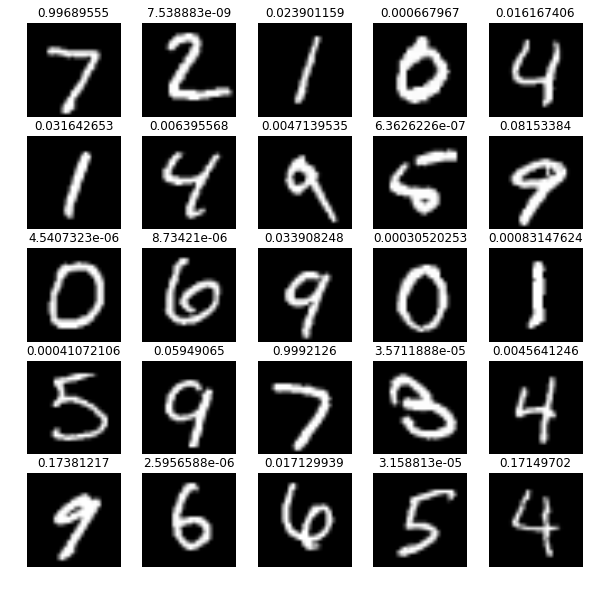

In [19]:
plt.subplots_adjust(hspace=1)
plt.figure(figsize=(10, 10))
for n in range(25):
    img = X_test[n]
    plt.subplot(5,5,n + 1)
    plt.title(predictions[n][0])
    plt.axis('off')
    plt.imshow(img, cmap='gray', interpolation='bilinear')

In [20]:
class_predictions = model.predict_classes(X_test_7)

In [21]:
wrong = np.where(class_predictions.flatten() != Y_test_7)

In [22]:
wrong[0].shape

(151,)

<Figure size 432x288 with 0 Axes>

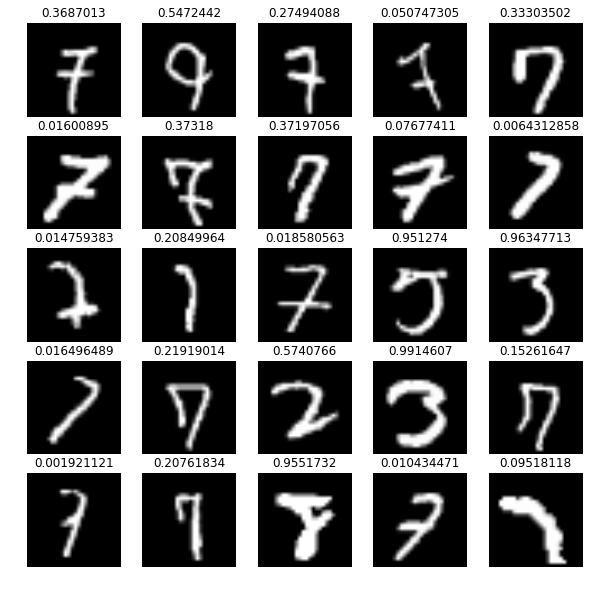

In [23]:
plt.subplots_adjust(hspace=1)
plt.figure(figsize=(10, 10))
for i, n in enumerate(wrong[0][25:50]):
    img = X_test[n]
    plt.subplot(5,5,i + 1)
    plt.title(predictions[n][0])
    plt.axis('off')
    plt.imshow(img, cmap='gray', interpolation='bilinear')

In [24]:
input_dim = 784 #28*28 
X_train_all = X_train.reshape(60000, input_dim) 
X_test_all = X_test.reshape(10000, input_dim) 
X_train_all = X_train_all.astype('float32') 
X_test_all = X_test_all.astype('float32') 
X_train_all /= 255 
X_test_all /= 255

In [25]:
Y_train_all = np_utils.to_categorical(Y_train, 10) 
Y_test_all = np_utils.to_categorical(Y_test, 10)

In [26]:
output_dim = nb_classes = 10 
all_model = Sequential() 
all_model.add(Dense(output_dim, input_dim=input_dim, activation='softmax')) 
batch_size = 64 
nb_epoch = 50

In [27]:
all_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 
history = all_model.fit(X_train_all, Y_train_all, batch_size=batch_size, epochs=nb_epoch,verbose=1, validation_data=(X_test_all, Y_test_all)) 
score = all_model.evaluate(X_test_all, Y_test_all, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 58us/step - loss: 1.0002 - acc: 0.7709 - val_loss: 0.6100 - val_acc: 0.8565
Epoch 2/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.5588 - acc: 0.8612 - val_loss: 0.4819 - val_acc: 0.8793
Epoch 3/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.4768 - acc: 0.8764 - val_loss: 0.4303 - val_acc: 0.8879
Epoch 4/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.4369 - acc: 0.8838 - val_loss: 0.4009 - val_acc: 0.8958
Epoch 5/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.4120 - acc: 0.8892 - val_loss: 0.3819 - val_acc: 0.8985
Epoch 6/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.3948 - acc: 0.8926 - val_loss: 0.3672 - val_acc: 0.9032
Epoch 7/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.3818 - acc: 0.8955 - val_loss: 0.3567 - val_acc

In [84]:
all_predictions = all_model.predict_classes(X_test_all)

<Figure size 842.4x595.44 with 0 Axes>

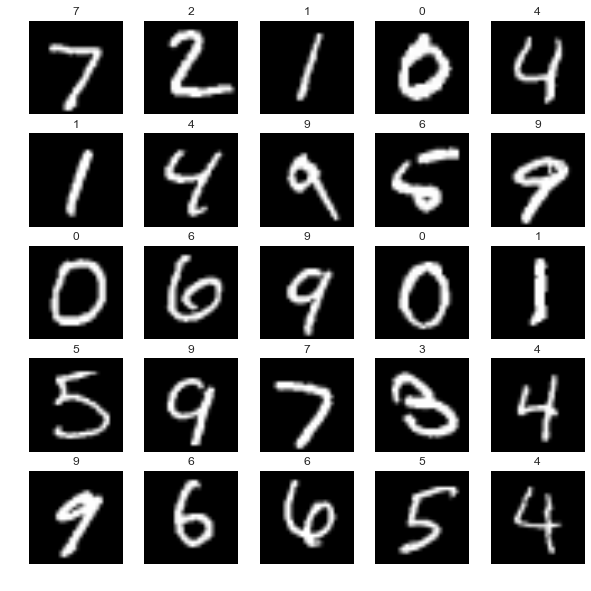

In [85]:
plt.subplots_adjust(hspace=1)
plt.figure(figsize=(10, 10))
for n in range(25):
    img = X_test[n]
    plt.subplot(5,5,n + 1)
    plt.title(all_predictions[n])
    plt.axis('off')
    plt.imshow(img, cmap='gray', interpolation='bilinear')

In [86]:
all_wrong = np.where(all_predictions.flatten() != Y_test)

In [87]:
all_wrong[0].shape

(789,)

<Figure size 842.4x595.44 with 0 Axes>

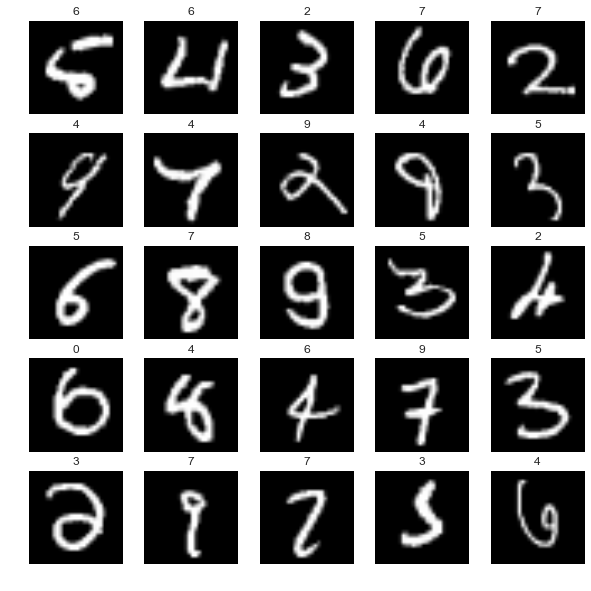

In [88]:
plt.subplots_adjust(hspace=1)
plt.figure(figsize=(10, 10))
for i, n in enumerate(all_wrong[0][:25]):
    img = X_test[n]
    plt.subplot(5,5,i + 1)
    plt.title(all_predictions[n])
    plt.axis('off')
    plt.imshow(img, cmap='gray', interpolation='bilinear')

In [89]:
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

X_train_cnn = X_train_cnn.astype('float32')
X_test_cnn = X_test_cnn.astype('float32')

X_train_cnn /= 255
X_test_cnn /= 255

In [90]:
cnn_model = Sequential()
cnn_model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
cnn_model.add(Dense(128, activation=tf.nn.relu))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(10,activation=tf.nn.softmax))

In [91]:
cnn_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
cnn_model.fit(x=X_train_cnn,y=Y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 78s 1ms/step - loss: 0.2051 - acc: 0.9381
Epoch 2/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0833 - acc: 0.9750
Epoch 3/10
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0573 - acc: 0.9818
Epoch 4/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0453 - acc: 0.9855
Epoch 5/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0352 - acc: 0.9886
Epoch 6/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0287 - acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0248 - acc: 0.9919
Epoch 8/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0199 - acc: 0.9933
Epoch 9/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0219 - acc: 0.9926
Epoch 10/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0180 - acc: 0.9940

In [94]:
cnn_predictions = cnn_model.predict(X_test_cnn)

In [96]:
cnn_predictions_class = cnn_model.predict_classes(X_test_cnn)

In [97]:
cnn_wrong = np.where(cnn_predictions_class.flatten() != Y_test)

In [100]:
cnn_wrong[0].shape

(166,)

<Figure size 432x288 with 0 Axes>

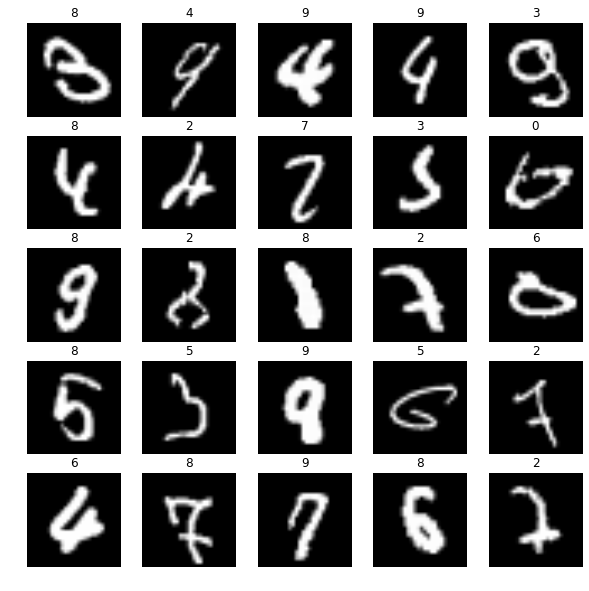

In [103]:
plt.subplots_adjust(hspace=1)
plt.figure(figsize=(10, 10))
for i, n in enumerate(cnn_wrong[0][:25]):
    img = X_test[n]
    plt.subplot(5,5,i + 1)
    plt.title(cnn_predictions_class[n])
    plt.axis('off')
    plt.imshow(img, cmap='gray', interpolation='bilinear')

## Conclusion
- Whatever shape the robot takeover comes in will require lots of data.
- That data needs to be fed through a model, so coercing the data into the right shape for the model might require compromise
- There is an incentive for people building these systems to simplify input to help make better models
    - i.e. turn things into glorified multiple choice
- There is some cool math in all of this
    - Consider the emotion reading problem for a humanoid robot.
- Oh yeah, one more thing...

In [6]:
textgen = textgenrnn.textgenrnn()
textgen.train_from_file('/Users/mmoran/Desktop/mmc2019/conf_book.txt', num_epochs=10)

290 texts collected.
Training on 96,491 character sequences.
Epoch 1/10
753/753 [==============================] - 376s 499ms/step - loss: 1.5621
####################
Temperature: 0.2
####################
110 TI-DISIES STATIONS THE AND CANNING STATE THE STUDENTS AND STAT AND STAT THE ALL STAR AND THE STAT AND AND CANCAL INSTREEDING THE AND THE AND THE STUDENTS THE STUDENTS THE THE CONDERSES STATE THE STAT STATE TO MATHEMATICS STATIONS STATING STATE TO MATHEMATICS STATIONS STATING THE STATE TO MATHEM

110 TI-NEW DISCESTING THE AND STAT THE STATE THE STATE STATE THE STUDENTS THE IN THE AND AND THE CONDERING STUDENTS STAT THE THE STATIONS FOR WHAT THE STATIONS THE WHAT THE STATIONS AND STATE THE WANDS STATING STATE TO MATHEMATICS STATIONS STATION THE AND THE AND STAT THE NOW IN THE AND STRATERACTI

110 MATHEMATICAL STATIONS STATIONS STATIONS STATIONS STATIONS STATIONS STARES STAR STATE TO MATHERECS STATIONS STAR STATING STUDENTS THE STATIONS STAR STATIONS STATIONS STARCICS STATIONS STATE 

753/753 [==============================] - 366s 486ms/step - loss: 1.1285
####################
Temperature: 0.2
####################
226 CODING STUDENTS IN THE STUDENTS TO MATH THE CONCESS STUDENTS IN MATH TO PROBLEM SOLVING Steve Marine Kater 6-12 In this workshop will be activities to develop the math concepts and provide the math class and strategies. We will discuss some of the math classrooms. We will discuss the concepts o

209 MATH TO PROBLEM TO DEVICS Steve Come Come the Conference of the Thinking and Steve Chansentent is the math concepts of the math concepts.

209 APPROACY TO BASED ON STRATEGO IN AP STUDENTS IN THE CONCESS STRATEGO TO PROBLEM SOLVING Steve Marine 6-12 This workshop will be successfully and support and concepts and concepts and engage your students in the concepts and the math computer to share the math concepts. We will discuss the probl

####################
Temperature: 0.5
####################
205 MATH THAT MODULCS MATH IN THE MATH MATHEMATICS TO DIFFENIZA

307 THE NEW STUDENTS IN THE UNDERSTANDING STUDENTS IN MATH MATHEMATICS Steve 6-12 We will get some students to engage your students who think about the problems that work their own original strategies. We will construct to the equitable activities that will engage your students and demonstration an

####################
Temperature: 0.5
####################
307 PROBLEMS Jack BROGING Kanggg & Derek & Research 6-12 We will share with and server students to demonstrate methods of incorporating their own classroom.

305 PROBLEM SOLVING George Marino & John Hangon 6-12 Board assess assessments will be minimalized for students and or the activities that be able to teach mathematics and the problems will be applied to meet the school problems that will be covered in math and equitable strategies. Come to explore 

305 COLOR STRUCTURES John Benty Viktora 9-12 Let’s be they do you guy the place? Students can be applied to engage your students to explore the serving is interested to computer the

229 THE WORD OF CAS AND CODING AND COMMONS THEIR DESMOS TO STATISTICS SENSES John Bendohlo & Karen Triea & SESS 10-12 In this workshop we will pose in Algebra the reasoning problems and can be able to engage students to construct the interrelated problems that have become multiplication and problem

308 SETION WITH THE COMMON FOR STUDENT STATUS Suggest Research, LEGN & STANDARDS THROUGH STUDENT THROUGH STUDENT GEOMETRY THROUGH MATH CONTERSTANDING MATH AND CODING AND YOUR STUDENTS IN THE UP OPTEP Bolgyn & Martin Marino 1-6

225 RETHINK! EXAM INVESTIGATION MATH MATHEMATICS FOR STUDENT AND SENSE AND COMPLE Kelly Kram & EMround K-Stenware in Common Core with a huntly play about the productive problems in math theorems and to be able to teach your classroom on the communication and relationship is for a look figure of the

####################
Temperature: 1.0
####################
307 STUDENTS THROUGH DAY GAMEBOID FOR Eri Shapun Kristent Huebilis SHOULEM STEM Scott K-8 Have you emphasize Ex

In [100]:
textgen = textgenrnn.textgenrnn()
textgen.train_from_file('/Users/mmoran/Desktop/mmc2019/conf_book.txt', num_epochs=10)

482 texts collected.
Training on 160,346 character sequences.
Epoch 1/10
1252/1252 [==============================] - 784s 626ms/step - loss: 1.5023
####################
Temperature: 0.2
####################
227 A CALCUATING AP AP AP AP AP AP ABLE CALCUUL A Standard AP Through the student answer to problem and students to include the student content their studentt and the content classroom of the studentt of the problem and a strategies of the problem for the The Come Advance A Common Common Problem an

227 A FUNCATICALLY I THE CALCICAL THE AP AP AP AP AP APPRING APPRING AP AP THE THE AP ABLE CALCUS AP A CALCUAL Standard Star WHA A CALCUAL THE THE STUDENT THE AND CALCUE ABLE ABLE ABLE SCANCE THE AND AP THE MATH AND CALCUALICAL THE CALCUES ALGEBRA Star WHA AP THE A PROBLE ASSES AP AP AP ASSES ASSES

227 THE A THE AP APPRITATION AB AP ABLE ABLE STUDENT ABOUT THE AP THE AND ALL AP AP AP AP AP ALGEBRA Star WHIT ALL STUDENT STUDENT ASSES AP AP AP AP THE AND A PROBLE GETICAL STUDENT TALK AP 

126 WROUGH FISSING IN MATH: THE TEACHING MY ALGEBRA!! WHEY THE WEARISH TE IT! MOREE! Devalory, Rynoli 6-12 The introduction tosk and material posies that projects and magical ways.

Epoch 4/10
1252/1252 [==============================] - 671s 536ms/step - loss: 1.1283
####################
Temperature: 0.2
####################
210 THE COMMON FOR THE MATHEMATICS AND STRUCTION FOR THE COMMON CORE DO THE MATH TO DEVELOPING MATH STUDENTS SOLVING STUDENTS FOR THE COMMON CORE STUDENTS SOCIAL TO DEVELOPING STUDENTS STUDENTS TO COMMON COMMON CORE STUDENT STRUCTION STUDENTS AND STRUCTION STUDENTS John Benn Core Carroll 7-12 We wi

201 MATH CLASS Carrie Starrs & Julie Hardin K-5 This workshop will be asked for all levels of the problem of the problem of the problem of the connection of the first problem of the problem with a standards and mathematical strategies to engage and use the connection of the problem of the problem o

211 MATH TO COMMON FOR THE COMMON FOR THE COMMON STRATEGIES Carroll Co

1252/1252 [==============================] - 603s 481ms/step - loss: 0.9505
####################
Temperature: 0.2
####################
113 CODING THINKING THE CALCULUS Steve Viktora 9-12 This session will explore and share the problem to discuss the problem of the mathematics to engage your students to engage your students to engage your students to discuss the problems and teaching the problems and the session will be shared to e

118 THE TI-NSPIRE THIS A FOR PROBLEM CALCULUS Steve Viktora 9-12 This session will explore the problem on workshop will be shared to the sequence of the problems and make connections to engage your students and students to engage your students and students to engage your students and students to ex

118 THE TI-NSPIRE THINKING THE STUDENTS Steven Core Spangler 7-12 This session will explore the problems and teachers will explore the communication of the number of the common content of the problems and then work the ready of the mathematics to engage your stud

125 THE MATH CLASSROOM STATS OF DESMOS – THE SOLVING STUDENTS Scott Nemecek 9-12 The problem of the unit can be used to engage your students and seem to develop the concepts of the compass of problems and activities to do to planne their mindsets and the concepts of the problem of the powerful stra

####################
Temperature: 0.5
####################
304 MATH COMMON FOR PROBLEMS AND STATISTICS IN A CONCEPTIES WITH MATH TEACHING AND SOLVING TEACHING CLASSROOM Annie Forest 9-12 There is a student word aspects of the route of mathematics with the problem and thinking about all learned back to all learners.

321 MATH TO DESMOS FOR ALGEBRA AND “REALLY Scott Kelly Mathematical SpeakerHets the Common Core Standards and Probability to the complete conceptual applications of the standards of all of the Common Core Standards, and the new team and connect of the process in the content activities that include 

314 MATH TEACHING AND HANDS-ON Martin Funk 9-12 Will be minimal triangle and stu

In [29]:
textgen = textgenrnn.textgenrnn()
textgen.train_from_file('/Users/mmoran/Desktop/mmc2019/conf_book.txt', num_epochs=25)

482 texts collected.
Training on 160,346 character sequences.
Epoch 1/25
1252/1252 [==============================] - 654s 522ms/step - loss: 1.5161
####################
Temperature: 0.2
####################
321 THE THE STUDENTS IN THE STUDENTS STUDENTS IN STUDENTS FOR MATH STUDENTS TO STUDENTS IN THE MATH STUDENTS STUDENTS IN THE STUDENTS AND STUDENTS ALGEBRA STUDENTS Standards Standards and students will be a problem of the students to do and problem and do the activities that are students to deal an

321 THE TO STUDENTS STUDENTS AND STUDENTS STUDENTS Steve Come Standards 9-12 The workshop will be a problem of the ready to probably a math concept and do the concept of the document concept and students to do some learning and students and students will be a problem to student and problem and stud

211 THE STUDENTS TO STATISTICS IN THE STUDENTS STUDENTS STUDENTS AND STUDENTS STUDENTS ALGEBY THE STUDENTS IN THE STUDENTS STUDENTS IN THE MATH STUDENTS STUDENTS STUDENTS TO STUDENTS IN THE 

228 EXAM METY Dearing 9-12 Operate in different problem-session to make curing criters. Ot the couple of function, specific owning and two non-new clues zommmethames and proofs and on their behind. If the worlt as much everyday bbish tips? play! Participants will be up on the powerful practice part

Epoch 4/25
1252/1252 [==============================] - 1661s 1s/step - loss: 1.1728
####################
Temperature: 0.2
####################
207 DESMOS IN ALGEBRA TI-NSPIRE STUDENTS AND THE STANDARDS STUDENTS AND STUDENTS TO BESTURE STUDENTS STATISTICS AND STUDENTS AND STUDENT STUDENTS STANDARDS Steven Krouse 6-12 Are you with the several content and the learning for the students to the student with the session of a variety of the conte

207 DESMOS TO PROBLEM DO I Design More Standards 6-12 This workshop will be a research learn of the problem and the problem solving and the content and the series of the content classroom and the learning and the learning and the math classroom? We will 

101 PARTARS TO AND CRESTING Pauler 6-14 Let's illegari plan the papers and findining problems that are geody solution. We will might started classroom learning that to complete many encourts and take as mathematical knowledge case reasoning into what under created GeoGer Geon 2 These strets for boo

205 MATHEMATICAL TWOWN REALING TO TO ACTIVE TE THE MATHEMATICAL ALGEBRA AND SEQUERES ABOUCT-EDSBRATICAL SURALITY JUCTS & MUGILE, DUNC – 2-12 Different retrssions an BAPD teacher tell to redoial math deal agains problems, but we kind the relationship on the rubiends and haven't explore your strong? 

Epoch 7/25
1252/1252 [==============================] - 651s 520ms/step - loss: 1.0468
####################
Temperature: 0.2
####################
305 FRACTIONS THAT MATH THE MATH CALCULUS STANDARDS SOME STATISTICS IN A MATH MATH IN A MATH INTERACTIONS AND MATH THE MATH CALCULUS Steve Viktora 9-12 This workshop will explore students to the standards of students to develop a student concepts and t

1252/1252 [==============================] - 679s 542ms/step - loss: 0.9478
####################
Temperature: 0.2
####################
313 MATH THE MATHEMATICAL SOLVING STUDENTS SOLVING THINKING THE COORONE STATISTICS THE STANDARDS Steve Viktora 8-12 We will share the students to explore a context problem to the context attendees and the context problem students to the connection of the contextual strategies that help students to 

313 MATH THE MATHEMATICS CLASSROOM Steve Viktora 8-12 The point and the offer activity that students to use the Common Core Standards and the Common Core Standards. We will also discuss the problem solving students to the standardic strategies and the activities that help students to the tesscopie 

113 CONNECTING THE COMMON CORE STATISTICS George Moran & Matthew Moran 8-12 The problem is the point that you can use the point that you can use the students to explore the problems to be successfully to solve problems that help students to the standardic of the 

324 STANDARDS THAT BEYON AND DOWN WITH UNDERSTANDING MATH CLASSROOM FUN ENGAGING STRUCTURES And Builder Practices 6-12 This workshop will also discuss the practice in your classrooms. Be prepared to increase student ways to our students meaning in promote grade Geometry activities that involve stud

313 STUDENTS IN ALGEBRA K-12 A UNTIL ABBLE CALCULATORS Paul We Kroom 6-12 Desmos course with graphs, and interesting students to broaden and use the problem solving and supporting math concepts.

####################
Temperature: 1.0
####################
204 BEGINING various craft actor with a classroom with level (Forms of your classroom grades and our sources don't have the wider politically do you metal? This workshop will come taking a meaningful conversion for middle and discourse protocols, explorational classes, soon topics, students and con

116 ENGAGING FACTICE CALCULUS Ruth Borabel3 & R-“SECONDAFER Measuremer, Stevy Chishoraloges, Reun Runs Modet Forems, Twitter and Larger 8-11 Ma

227 COLORING MATH CLASSROOM Mark O’Manstan 8-12 Teachers will assess student discovery and shapes, and the needs of formatively, and student problems with a few tools to develop a meaning that they can explore connections to promote your students to explore the problem in your classrooms.

122 THE MATH CLASSROOM A CREATIVE AND WEEK DOWN WITH WE HOW DEVELOPING STATE STATISTICS AND CALCULUS LEARNING Anna Katheris 6-12 Do you have the powerful teaching of the common coding and challenging and related to what with a conceptual to the exam of math tasks.

####################
Temperature: 1.0
####################
225 WANNAMING MATHEMATICS WE HNPIZS: A GRADE? Janelle Chandsogra Constein 9-12 Look it to participate in the conditive concepts and often have increased to make a research learner take you what is strengthek to pive up instruction we or develop a fun environment of any multiple activities that work

216 MINT TO MAKE RY: A MATH CCSSIONS "Matt Ages" into a kipp-bath method and comput

313 MATH Eswishort in Cuttin BensBtick Almon Ashly, Penchan, Set in Algebra, its 3-8 Are you used for activities and learning exrationships 75 Unit propegek of college problems, participants will also discuss standard by all problems and support student elementary and artifack from the process at t

104 CALCULUS AND RESPERTIONAL RESOOPLES IN MATH CLASSROOM Ginna Reard out of your conversations.

Epoch 20/25
1252/1252 [==============================] - 594s 475ms/step - loss: 0.6522
####################
Temperature: 0.2
####################
225 CODING THE WORLD IN THE COMMON CORE STUDENTS Start & Jennifer Mathematic App 9-12 In this workshop, I will discuss a broad problem-based learning experiences and problems and create an engagement of the concepts and provide an engagement of math assessments that provide into math concepts and a

116 MATH THE MATH CLASSROOM CAS AND STATISTICS AND MATHEMATICAL PROBLEMS AND MATH CALCULUS Scott Knapp 8-11 Thiig beginning in the group and some of the 

126 PROBLEM SOLVING STUDENTS IN ALGEBRA II AND PRE-EDU AND CONSE SOLVENT THINKING THE STATISTICS EXAM Michael Keyton 8-14 In this workshop, we will present techniques of functions and common misconceptions while students and teachers are an easier level of the shapes? Do you have the activities tha

####################
Temperature: 0.5
####################
325 STUDENTS SANT IN HANDS-ON GRADES OF CARDS AND KEY Pauline O'Dwy throughout free cookies and engaging activities that will create technology in the classroom? Ditch your students will be an enjoyable mathematics to be. We will discuss students for the mathematics around.

319 BEGINNING AND STANDARDS-BASED LEARNING Steve Viktora 9-12 The problem is the difference to decide which operations to increase students looked at all levels and teachers will be shared to support the problem and the example behind the behind and want to do any problem. We will explore several o

221 DEVELOPING STUDENTS’ MATHEMATICS Christopher & Julie Builde

## MMC Conference of Workshops - Next Saturday
- **112 ALGEBRA AND STANDARDS THROUGH STUDENTS IN MATH CLASSROOM Matthew Moran 6-12** In this workshop, we will look at some classic mathematical confusion with student work.
- **325 COLORING TO DEVELOPING STUDENTS IN ALGEBRA 2 Chu &** This session will be a great with the politics of the content and conceptual understanding.
- **308 THE STUDENT STRATEGIES FOR MATH MATH CLASSROOM Steve Viktora, John Benson 8-12** This session will be a group development of a standards and accessible for students to make a discussion of a fun and activities that promote a collaborative learning environment.
- **123 CCSSM: THE MATHEMATICS CLASSROOM Matthew Moran 6-14** We will discuss students want to use the structure of the mathematics to understand the standards as well as the role of the concepts and engaging activities that are activities to bring a log problem to allow students to make a collection.

- Note, these are fake and generated by an RNN trained on the talk descriptions from the 483 talks at past workshops from 2015 thru 2019

In [31]:
textgen.generate(5, temperature=0.1)

 20%|██        | 1/5 [00:06<00:26,  6.50s/it]

314 FUNCTION FUNDAMENTALS Steve Viktora 8-12 Come explore a session about the interrelationship of the standards and make connections with others. We will share students and discuss teaching and subtraction to the exam's conceptual understanding of individual students and then explore activities th



 40%|████      | 2/5 [00:12<00:19,  6.43s/it]

109 A PROBLEM SOLITE IN THE COMMON CORE STATE STANDARDS Katie Rose Chisees, Andra Planeraling & Matthew Moran 6-12 In this workshop, we will explore the structure of the mathematics courses? We will collaborate on common misconceptions while students and discussion with hands-on activities that wil



 60%|██████    | 3/5 [00:19<00:13,  6.51s/it]

312 MATH INTERSE PARTED IN A STUDENT STATISTICS IN A FOURTH CORE STANDARDS WITH THE MATH CLASSROOM Cathy Kaduk 5-8 Come see a session about starting problems and support the Common Core Standards. We will cover proven routines to create a log racher and developing math concepts or the Common Core. 



 80%|████████  | 4/5 [00:24<00:06,  6.20s/it]

302 MATH INTERSE PROBLEMS AND STRATEGIES FOR MATH MATH MATH CLASSROOM Annara Greems, Mary Rukin 8-12 How can teachers will apply student worksheets with other paper programming and science classrooms. We will share students and solutions.



100%|██████████| 5/5 [00:31<00:00,  6.17s/it]

122 ALGEBRA AND PRE-EXPERING FOR ALGEBRA II IN THE MATHEMATICS CLASSROOM Steve Starr & Alex Steve Viktora 8-12 We will discuss a way to do non-students using their own classrooms. The interactive calculators can be used to create and complex in your classroom.



In [32]:
textgen.generate(20, temperature=0.1)

  5%|▌         | 1/20 [00:05<01:38,  5.16s/it]

123 COLLABORATING THE STATISTICS ON MATH CLASSROOM Steve Starr & Jennifer Dao 6-12 We will discuss a way to differentiate instruction to provide instruction and the number line to enhance their own device in their classrooms.



 10%|█         | 2/20 [00:11<01:41,  5.63s/it]

223 COLLABORATING THE STATISTICS ON MATH CLASSROOM Steve Starr & Steve Viktora 8-12 We will discuss a way to do non-rich teachers and computer structures to the conceptual on the mathematics of coloring. It is some tiard and instruction. We will share several of your students and explore some of th



 15%|█▌        | 3/20 [00:17<01:34,  5.55s/it]

315 FAVORITE CONSTRUCTIONS THROUGH PROBLEMS TO THE STATISTICS ON MATH MATH CAS John Benson 8-12 In this workshop, we will examine the basic activities that will construct properties of the mathematics classroom with the common core.



 20%|██        | 4/20 [00:24<01:34,  5.93s/it]

308 FINANCIAL LITERACY IN THE MATHEMATICS CLASSROOM Marissa K-8 This session will discuss a way to practice and resource their own experiences. We will cover proven resources that promote a collaborative learning environment. We will collaborate to leave this share-session with a student engage in 



 25%|██▌       | 5/20 [00:31<01:37,  6.49s/it]

123 CCSSM: THE MATHEMATICS CLASSROOM Matthew Moran 6-14 We will discuss students want to use the structure of the mathematics to understand the standards as well as the role of the concepts and engaging activities that are activities to bring a log problem to allow students to make a collection of 



 30%|███       | 6/20 [00:39<01:35,  6.79s/it]

204 STRATEGIES FOR THE MATH CLASSROOM Condie Status 6-14 From the TI-Nspire and the TI-84 and Base Back Chilsurations will be provided in the group develop our students? What is ever? Wondering students will explore the relationship between students to make a collaborative curriculum assessments an



 35%|███▌      | 7/20 [00:42<01:12,  5.60s/it]

308 FINANCIAL LITERACY IN THE MATHEMATICS CLASSROOM Marissa K-8 This session will discuss how to set up their learning.



 40%|████      | 8/20 [00:46<01:02,  5.22s/it]

303 MATH INTERSE PROBLEMS AND COMMON CORE MATH CLASSROOM Anna Karlovsky 7-12 In this workshop, we will explore activities that will also discuss the problem and work their own classrooms.



 45%|████▌     | 9/20 [00:53<01:03,  5.78s/it]

123 COLLABORATING THE STATISTICS ON MATH CLASSROOM Steve Starr & Since Petrof Lessentine 9-12 This workshop will be a great with it into a standards. Be prepared to discuss the same people as a positive teaching functions to student math concepts. We will share several of your students and explore 



 50%|█████     | 10/20 [01:00<01:02,  6.25s/it]

308 THE STUDENT STRATEGIES FOR MATH MATH CLASSROOM Steve Viktora, John Benson 8-12 This session will be a group development of a standards and accessible for students to make a discussion of a fun and activities that promote a collaborative learning environment. This workshop will explore what the 



 55%|█████▌    | 11/20 [01:08<00:58,  6.51s/it]

109 A PROBLEM SOLITE IN THE COMMON CORE STATE STANDARDS Katie Rose Christine Jurich-Sarna K-6 Correct Content 3-8 Participants will engage a give problem to the content of the concepts and resources to solve students to make a collaborative curriculum wanting grade levels that help students about t



 60%|██████    | 12/20 [01:12<00:46,  5.87s/it]

109 A PROBLEM SOLITE IN THE CLASSROOM Carrie Fraher 7-12 The practical can be addressed to transformed mesh the Common Core Mathematical Practices.



 65%|██████▌   | 13/20 [01:15<00:35,  5.04s/it]

124 STUDENT MATHEMATICAL PRACTICES: CONSTRUCTIONS Steve Viktora 8-12 Come explore a priority of the content of algebra.



 70%|███████   | 14/20 [01:19<00:29,  4.83s/it]

109 DISCRETE MATH THROUGH STUDENTS IN THE UNDERSTANDING Steve Starr 6-12 Are you looking for standards and teachers are achiet when they all your classroom.



 75%|███████▌  | 15/20 [01:26<00:27,  5.51s/it]

302 MATH INTERVENTION IN THE MATHEMATICS CLASSROOM Matthew Moran 6-14 We will discuss students to demonstrate mathematical models. These activities will be shared a problem to the exam's content of a path or instruction and the reasoning concepts in the classroom? Do you have a few of the mathemati



 80%|████████  | 16/20 [01:34<00:24,  6.13s/it]

308 THE TI-NSPIRE CONNECTED LEARNING Steve Starr & Julie Brock 9-12 Join us as we explore a problem to the exam's concepts of functions, and the conceptual course. We will discuss students to deriving students and success in math classrooms and the need for more than a problem and high school mathe



 85%|████████▌ | 17/20 [01:42<00:20,  6.81s/it]

211 MATH TEACHERS AND COMMON CORE MATH CLASSROOM Steve Viktora 8-12 We will discuss a way to do non-students to inform our points to support the secondary problem and engaging activities that will talk about the scoring guides, and the reasoning can enhance desmos.com and least task.



 90%|█████████ | 18/20 [01:50<00:13,  6.91s/it]

327 EXPLORING THE WORKS ORDING CLASSROOM Steve Viktora 8-12 Come explore a priority of the standards, and more concepts and engage students to engage your students and their own discussion. The interactive calculators can be used to create an equitable classroom on the student system and then use i



 95%|█████████▌| 19/20 [01:55<00:06,  6.42s/it]

116 MATH THROUGH TRIG THE COMMON CORE STRATEGIES FOR MATH CLASSROOM Steve Viktora 9-12 We will do some classic methods that promote and develop a meaninggishing curriculum to motivate and engage in math concepts.



100%|██████████| 20/20 [02:02<00:00,  6.74s/it]

116 MATH THROUGH TRIG THE SCHEDULING DEVELOPING STUDENTS AND STUDENTS IN THE UNTER STANDARDS WITH THE SCHEDULING STRATEGIES FOR MATH MATH CLASSROOM Steve Viktora, John Benson 8-12 This session will be a group development of a standards and accessible for students to engage in mathematical models. T

